# TALLER 4

Orianna Sanguino 

201413158

In [1]:
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import numpy as np

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Ejemplo 1 

In [3]:
L=20
n=128

In [4]:
a= -L/2
b= L/2
c=n+1

d=-n/2
e= n/2

In [5]:
x2= np.linspace (a,b,c)

In [6]:
x = x2[0:n]

In [7]:
u = np.exp(-x*x)

In [8]:
ut = np.fft.fft(u)

In [9]:
utshift = fft.fftshift(ut)

In [10]:
modes = linspace(d,e,n)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


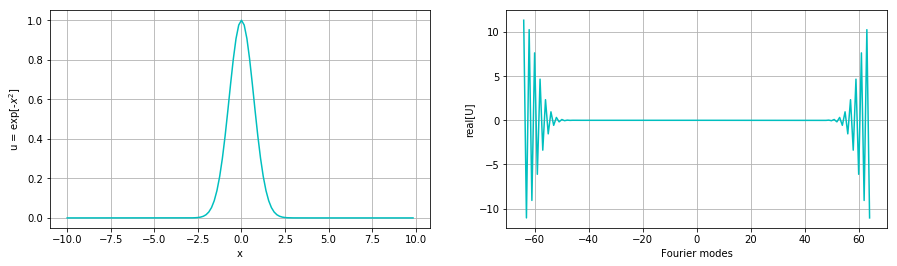

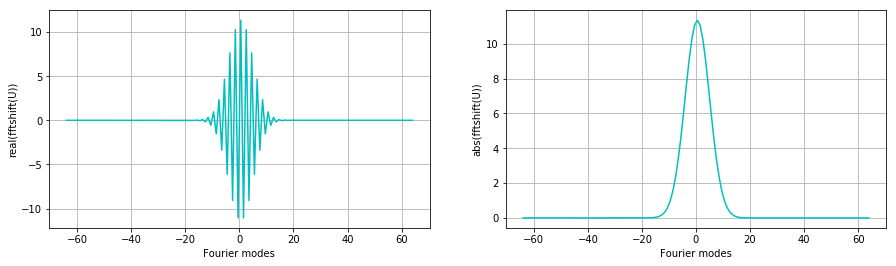

In [11]:
figure(figsize=(15,4))
plt.subplot(1,2,1)
pylab.plot(x,u,'-c')
pylab.xlabel("x")
pylab.ylabel("u = exp[-$x^2$]")
plt.grid()

plt.subplot(1,2,2)
pylab.plot(modes,ut,'-c')
pylab.xlabel("Fourier modes")
pylab.ylabel("real[U]")
plt.grid()

figure(figsize=(15,4))
plt.subplot(1,2,1)
pylab.plot(modes,utshift,'-c')
pylab.xlabel("Fourier modes")
pylab.ylabel("real(fftshift(U))")
plt.grid()

plt.subplot(1,2,2)
pylab.plot(modes,np.abs(utshift),'-c')
pylab.xlabel("Fourier modes")
pylab.ylabel("abs(fftshift(U))")
plt.grid()

## Ejemplo 2

In [12]:
L = 20
n = 128

In [13]:
a= -L/2
b= L/2
c=n+1

In [14]:
x2 = linspace(a,b,c)

In [15]:
x = x2[0:n]

In [16]:
dx = x[1]-x[0]

In [17]:
coship = np.cosh(x)
u = 1/coship

In [18]:
ut = np.fft.fft(u)

In [19]:
k = (2*np.pi/L)* np.concatenate(((linspace(0,(n/2-1),64)),(linspace((-n/2),-1,64))))

Calculo de derivadas

In [20]:
ut1 = 1j*k*ut
ut2 = -k*k*ut

In [21]:
u1 = real(np.fft.ifft(ut1))
u2 = real(np.fft.ifft(ut2))

In [22]:
u1exact = -(1/coship)*(np.tanh(x))
u2exact = ((1/coship)-2)*(1/coship)**3

Calculo de diferencias finitas para primera derivada

In [23]:
ux = linspace(0,n,n)
ux[0] = (-3*u[0]+4*u[1]-u[2])/(2*dx) 

for j in range(2,(n-1)):
    ux[j-1] = (u[j]-u[j-2])/(2*dx)
    
ux[n-1] = (3*u[n-1]-4*u[n-2]+u[n-3])/(2*dx)  

In [24]:
ux2 = linspace(0,n,n)
ux2[0] = (-3*u[0]+4*u[1]-u[2])/(2*dx)
ux2[1] = (-3*u[1]+4*u[2]-u[3])/(2*dx)

for j in range(3,(n-2)):
    ux2[j-1] = (-u[j+1]+8*u[j]-8*u[j-2]+u[j-3])/(12*dx)

ux2[n-2] = (3*u[n-2]-4*u[n-3]+u[n-4])/(2*dx)
ux2[n-1] = (3*u[n-1]-4*u[n-2]+u[n-3])/(2*dx)

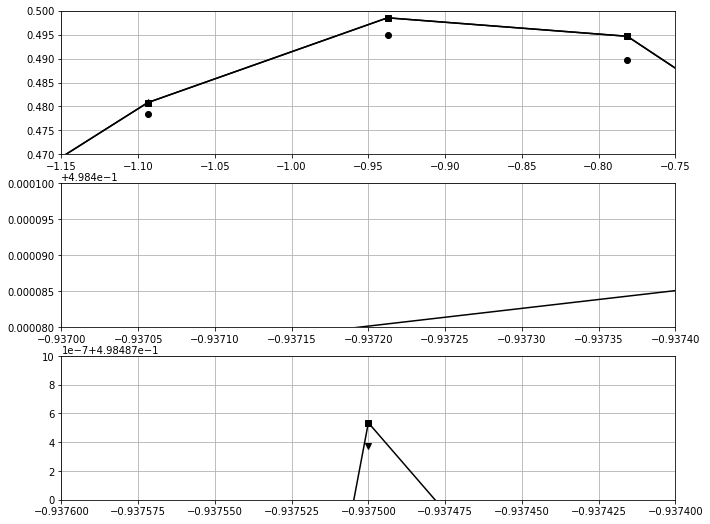

In [25]:
figure(figsize=(11,9))
subplot(3,1,1)
plot(x,u1exact,'ks-',x,u1,'k',x,ux,'ko',x,ux2,'k*')
axes = plt.gca()
axes.set_xlim([-1.15,-0.75])
axes.set_ylim([0.47,0.5])
plt.grid()

subplot(3,1,2)
plot(x,u1exact,'ks-',x,u1,'kv',x,ux,'ko',x,ux2,'k*')
axes = plt.gca()
axes.set_xlim([-0.937,-0.9374])
axes.set_ylim([0.49848,0.49850])
plt.grid()

subplot(3,1,3)
plot(x,u1exact,'ks-',x,u1,'kv',x,ux,'ko',x,ux2,'k*')
axes = plt.gca()
axes.set_xlim([-0.9376,-0.9374])
axes.set_ylim([0.498487,0.498488])
plt.grid()

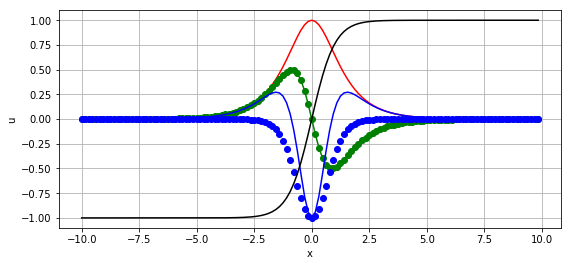

In [26]:
figure(figsize=(9,4))
pylab.xlabel("x")
pylab.ylabel("u")
pylab.plot(x,u,"r",x,u1,"g",x,u1exact,"go",x,u2,"b",x,u2exact,"bo",x,np.tanh(x),"-k")
plt.grid()

## Ejemplo 3

In [27]:
L= 30
n=512

In [28]:
a= -L
b= n+1

In [29]:
t2 = linspace(a,L,b)

In [30]:
t= t2[0:n]

In [31]:
k= ((2*np.pi)/(2*L))* np.concatenate(((linspace(0,(n/2-1),64)),(linspace((-n/2),-1,64))))

In [32]:
coshi = np.cosh(t)
u = 1/coshi

In [33]:
noise= 1

In [34]:
ut = np.fft.fft(u)

In [35]:
utn = ut + noise*(np.random.normal(0.0,1,n)+1j*np.random.normal(0.0,1,n))

In [36]:
un = real(np.fft.ifft(utn))

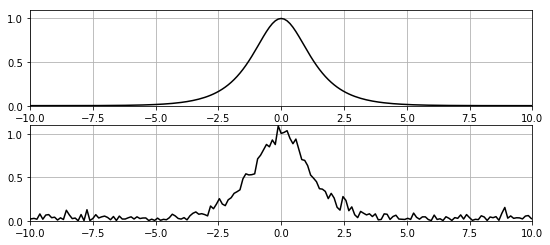

In [37]:
figure(figsize=(9,6))
subplot(3,1,1)
pylab.plot(t,u,"k")
axes = plt.gca()
axes.set_xlim([-10,10])
axes.set_ylim([0,1.1])
plt.grid()

subplot(3,1,2)
pylab.plot(t,abs(un),"k")
axes = plt.gca()
axes.set_xlim([-10,10])
axes.set_ylim([0,1.1])
plt.grid()

## Ejemplo 4

In [38]:
noise=10

In [39]:
ut = np.fft.fft(u)

In [40]:
utn = ut + noise*(np.random.normal(0.0,1,n)+1j*np.random.normal(0.0,1,n))

In [41]:
un = real(np.fft.ifft(utn))

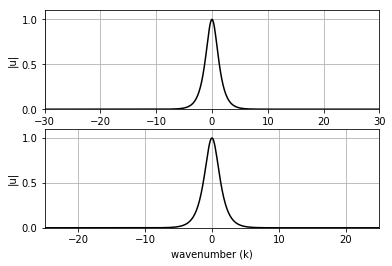

In [48]:
subplot(2,1,1)
pylab.plot(t,u,"k")
pylab.xlabel("time (t)")
pylab.ylabel("|u|")
axes = plt.gca()
axes.set_xlim([-30,30])
axes.set_ylim([0,1.1])
plt.grid()

subplot(2,1,2)
pylab.plot(t,u,"k")
pylab.xlabel("wavenumber (k)")
pylab.ylabel("|u|")
axes = plt.gca()
axes.set_xlim([-25,25])
axes.set_ylim([0,1.1])
plt.grid()